# **TP2 : Indicateurs pour la détection des défauts de roulement**

> **Objectif du TP :**

Le but de ce TP est de développer des indicateurs dans le but de detecter un défaut de roulement. Les indicateurs developpés seront appliquer sur une base de données contenant plusieurs signaux vibratoires d'un banc d'essais composé de 4 roulements.

## Partie 1 : Les indicateurs
Dans cette partie on va tester les indicateurs suivant :


*   Kurtosis :  $\mathrm{Kurt}=\frac{1}{N} \sum_{n=1}^N (x_n-\mathbb{E}\{x\})^4 /\left(\frac{1}{N} \sum_{n=1}^N (x_n-\mathbb{E}\{x\})^2\right)^2$
*   Negentropy : $\mathrm{NE}=\frac{1}{N} \sum_{n=1}^N \frac{x_n^2}{\frac{1}{N} \sum_{n=1}^N x_n^2} \ln \frac{x_n^2}{\frac{1}{N} \sum_{n=1}^N x_n^2}$
*   Ratio of L2 to L1 : $\mathrm{L} 2 \mathrm{L} 1=\sqrt{N} \frac{\|\boldsymbol{x}\|_2}{\|\boldsymbol{x}\|_1}$
*   Hoyer index : $\mathrm{HI}=\left(\sqrt{N}-\frac{\|\boldsymbol{x}\|_1}{\|\boldsymbol{x}\|_2}\right) /(\sqrt{N}-1)$


*   Improved Gini-index : $\mathrm{IGI}=1-\sqrt[p]{\sum_{n=1}^N \frac{\widehat{x_n}^p}{\|\boldsymbol{x}\|_p^p}\left(\frac{2(N-n)+1}{N}\right)}$
*   Geometric mean IGI : $\mathrm{GMIGI}=\sqrt{\mathrm{IGI}\times \mathrm{IGI}_{SES}}$

Où $x=[x_1,...,x_N ]$ est un signal échantillonné de taille $N$, et $\widehat{x}$ represente la version triée de $x$ avec des éléments croissants  $\widehat{x_1}<\widehat{x_2}<...<\widehat{x_N}$.

$\mathrm{IGI}_{SES}$ est l'indicateur IGI appliqué au spectre d'amplitude de l'enveloppe du signal.

$\|\boldsymbol{x}\|_p$ dénote la norme $p$ du signal $x$ : $\|\boldsymbol{x}\|_p = \sqrt[p]{\sum_{n=1}^N |x_n|^p}$

Pour le dernier indicateur $IGI$ on va utiliser plusieurs valeurs de $p=1$

Les indicateurs seront testé sur 6 signaux différents d'une même durée $T$ et échantillonnés avec $F_e$ :


*  $S_1(t)$ : signal aléatoire qui suit une loi normale $\mathcal{N}(0,0.5)$
*  $S_2(t) = 2\cos(2 \pi F_1 t) + 1.5\sin(2\pi F_2 t-\pi/6) + S_1(t)$
*  $S_3(t) = 5 h(t-T/2) + S_2(t)$ où $h(t) = 20 e^{-\beta t}\cos(2\pi F_r t)u(t)$
*  $S_4(t) = \sum_{n} h(t-n T_d) + S_1(t) $ où $T_d = T/8$
*  $S_5(t) = \sum_{n} h(t-(n T_d + \gamma_n)) + S_1(t) $ où $T_d = T/8$ et $\gamma_n $ valeur aléatoire

(On utilisera : gamma_n = np.random.randint(0,1500,size=1)/Fs)

*  $S_6(t) = \sum_{n} h(t-n T_d) + S_1(t)$  où $T_d = T/32$

$S_1(t)$ représente un fonctionnement normal d'un roulement. $S_2(t)$ décrit le fonctionnement normal d'un roulement en présence d'harmonique (engrenage). $S_3 (t)$ dénote un cas de fonctionnement normal avec un choc externe. $S_4(t)$ et $S_5(t)$ décrivent un roulement défectueux en présence d'harmonique et de d'un choc externe.

Les paramètres sont choisis comme suit :


*   $T = 5 sec$;  $F_e = 2048 Hz$ ; $F_1 = 40 Hz$ ; $F_2 = 75 Hz$; $F_r = 650 Hz$; et $\beta =150$.



1) Ecrire une fonction qui calcule les différents indicateurs mentionnés d'un signal $x(t)$

In [1]:

import numpy as np

def kurtosis(x):
    mean = np.mean(x)
    kurt = np.mean((x - mean)**4) / np.mean((x - mean)**2)**2
    return kurt

def negentropy(x):
    neg_ent = (np.mean(x**2) / np.sum(x**2)) * np.sum(x**2 * np.log(x**2 / np.sum(x**2)))
    return neg_ent
def l2l1_ratio(x):
    l2_norm = np.linalg.norm(x, ord=2)
    l1_norm = np.linalg.norm(x, ord=1)
    ratio = l2_norm / l1_norm
    return ratio
def hoyer_index(x):
    numerator = np.sqrt(len(x)) - np.linalg.norm(x, ord=1) / np.linalg.norm(x, ord=2)
    denominator = np.sqrt(len(x)) - 1
    hoyer_idx = numerator / denominator
    return hoyer_idx
def gini_index(x):
    sorted_x = np.sort(x)
    n = len(x)
    cum_sum = np.cumsum(sorted_x)
    gini_idx = 1 - np.sum((2 * (n - np.arange(1, n + 1)) + 1) * sorted_x) / (n * np.sum(sorted_x))
    return gini_idx

def improved_gini_index(x):
    p_values = np.arange(1, len(x) + 1) / len(x)
    igi = 1 - np.sum(sorted(x)**p_values) / np.sqrt(len(x))
    return igi

def geometric_mean_igi(x):
    igi = improved_gini_index(x)
    return igi * igi / np.exp(np.mean(np.log(x**2)))

def calculate_indicators(signal):
    kurt = kurtosis(signal)
    neg_ent = negentropy(signal)
    l2l1 = l2l1_ratio(signal)
    hoyer_idx = hoyer_index(signal)
    gini_idx = gini_index(signal)
    igi = improved_gini_index(np.abs(np.fft.fft(signal)))
    gm_igi = geometric_mean_igi(np.abs(np.fft.fft(signal)))

    return kurt, neg_ent, l2l1, hoyer_idx, gini_idx, igi, gm_igi

2) Calculer les indicateurs pour chacun des enveloppes des signaux $S_1(t)$, ..., $S_5(t)$ (On utilisera la valeur absolue de la transformée d'Hilbert pour le calcul e l'envelope)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert

# Paramètres
T = 5  # Durée en secondes
Fe = 2048  # Fréquence d'échantillonnage en Hz
F1 = 40  # Fréquence pour S2 en Hz
F2 = 75  # Fréquence pour S2 en Hz
Fr = 650  # Fréquence pour h(t) en Hz
beta = 150  # Paramètre pour h(t)
Td = T / 8  # Période pour S4 et S5 en secondes
gamma_n = np.random.randint(0, 1500, size=1) / Fe  # Valeur aléatoire pour S5

# Temps
t = np.linspace(0, T, int(Fe * T))

# Signal S1 : Aléatoire qui suit une loi normale
S1 = np.random.normal(0, 0.5, len(t))

# Signal S2 : 2cos(2πF1t) + 1.5sin(2πF2t - π/6) + S1
S2 = 2 * np.cos(2 * np.pi * F1 * t) + 1.5 * np.sin(2 * np.pi * F2 * t - np.pi / 6) + S1

# Fonction h(t) pour S3
def h_t(t):
    return np.exp(-beta * t) * np.cos(2 * np.pi * Fr * t) 

# Signal S3 : 5h(t - T/2) + S2
S3 = 5 * h_t(t - T / 2) + S2

# Signal S4 : Σh(t - nTd) + S1
S4 = np.sum([h_t(t - n * Td) for n in range(int(T // Td))], axis=0) + S1

# Signal S5 : Σh(t - (nTd + γn)) + S1, où γn est une valeur aléatoire
S5 = np.sum([h_t(t - (n * Td + gamma_n[0])) for n in range(int(T // Td))], axis=0) + S1



# Signal S6 : Σh(t - nTd) + S1, où Td est réduite à T/32
Td_sixth = T / 32
S6 = np.sum([h_t(t - n * Td_sixth) for n in range(int(T / Td_sixth))], axis=0) + S1


# Calcul des enveloppes des signaux
envelope1 = np.abs(hilbert(S1))
envelope2 = np.abs(hilbert(S2))
envelope3 = np.abs(hilbert(S3))
envelope4 = np.abs(hilbert(S4))
envelope5 = np.abs(hilbert(S5))
envelope6 = np.abs(hilbert(S6))

# Calcul des indicateurs pour les enveloppes
indicators_envelope_S1 = np.sum(envelope1)
indicators_envelope_S2 = np.sum(envelope2)
indicators_envelope_S3 = np.sum(envelope3)
indicators_envelope_S4 = np.sum(envelope4)
indicators_envelope_S5 = np.sum(envelope5)
indicators_envelope_S6 = np.sum(envelope6)

print("Indicateurs pour l'enveloppe de S1 :", indicators_envelope_S1)
print("Indicateurs pour l'enveloppe de S2 :", indicators_envelope_S2)
print("Indicateurs pour l'enveloppe de S3 :", indicators_envelope_S3)
print("Indicateurs pour l'enveloppe de S4 :", indicators_envelope_S4)
print("Indicateurs pour l'enveloppe de S5 :", indicators_envelope_S5)
print("Indicateurs pour l'enveloppe de S6 :", indicators_envelope_S6)


Indicateurs pour l'enveloppe de S1 : 6372.782751702348
Indicateurs pour l'enveloppe de S2 : 24283.472365603797
Indicateurs pour l'enveloppe de S3 : 6.121921968057235e+164
Indicateurs pour l'enveloppe de S4 : 1.6771797777915104e+286
Indicateurs pour l'enveloppe de S5 : nan
Indicateurs pour l'enveloppe de S6 : nan


C:\Users\amell\AppData\Local\Temp\ipykernel_22304\1741098904.py:26: RuntimeWarning: overflow encountered in exp
  return np.exp(-beta * t) * np.cos(2 * np.pi * Fr * t)


3) Comparer les différents valeurs obtenues pour les indicateurs et discuter les résultats

## Partie 2 : Analyse d'un signal de défaut de roulement

1) Exécuter la cellule ci ci-dessous pour charger un fichier qui correspond à un signal vibratoire d'un roulement défectueux.

In [3]:
from ftplib import FTP
import numpy as np
import os
def ConnectFTP():
    ftp = FTP('ftp.byethost10.com')   # connect to host, default port
    ftp.login('b10_35344372','BearingIMS')
    ftp.cwd("Bearing IMS/Data/")  #Current working dir
    return ftp
def ReadFiles():
  if not os.path.exists('FilesListe.txt'):
    ftp = ConnectFTP()
    Files = np.array(ftp.nlst())
    Files=Files[2:]
    np.savetxt('FilesListe.txt',Files,delimiter=',',fmt="%s")
  else:
    Files = np.loadtxt("FilesListe.txt",delimiter=',',dtype='str')
    ftp = []
  return Files,ftp
def LoadFiles(Filename,ftp):
  Datadir = './Data/'
  if not os.path.exists(Datadir):
    os.mkdir(Datadir)
  filename = Datadir + Filename
  if not os.path.exists(filename):
    lf = open(filename, "wb")
    Flag = True
    Itermax = 10
    Iter = 0
    while Flag & (Iter<Itermax):
      try :
        ftp.nlst()
        Flag = False
        Iter = Iter + 1
      except:
        ftp = ConnectFTP()
    ftp.retrbinary("RETR " + Filename, lf.write)
    lf.close()

  Data = np.genfromtxt(filename, delimiter="",filling_values=0,invalid_raise=False)

  if len(Data)==0:
    os.remove(filename)
    Data = LoadFiles(Filename,ftp)

  return Data.transpose()
###
Files,ftp = ReadFiles() # Load liste of files
Data = LoadFiles(Files[630],ftp) # Select and load the file 630
Sig_IMS = Data[0] # Select the first channel
Fs = 20e3

2) Tracer le spectre d'amplitude du signal et commenter les résultats.

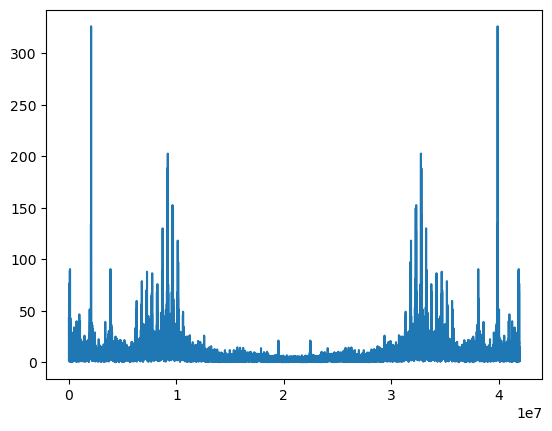

In [4]:



N=len(Sig_IMS)
Freq=np.arange(0,N)/t[1]
plt.plot(Freq,abs(np.fft.fft(Sig_IMS)))



3) Calculer l'enveloppe du signal.

In [5]:
envelopesig = np.abs(hilbert(Sig_IMS))
print("l'enveloppe de Signal :",envelopesig )

l'enveloppe de Signal : [0.08331372 0.04473301 0.07088347 ... 0.14780462 0.12934284 0.12140481]


4) Tracer le spectre de l'enveloppe et commenter les résultats

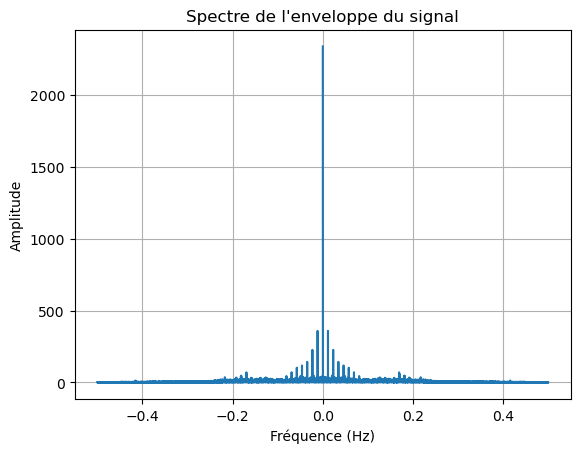

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Calcul de la transformée de Fourier de l'enveloppe du signal
fft_envelope = np.fft.fft(envelopesig)
frequencies = np.fft.fftfreq(len(fft_envelope))

# Tracé du spectre de l'enveloppe
plt.plot(frequencies, np.abs(fft_envelope))
plt.title('Spectre de l\'enveloppe du signal')
plt.xlabel('Fréquence (Hz)')
plt.ylabel('Amplitude')
plt.grid()
plt.show()



5) Déduire la fréquence caractéristique du défaut de roulement et le type de défaut de roulement.

6) Filtre le signal entre 2500 Hz et 5500 Hz et calculer le spectre de son enveloppe. On utilisera "Butter" et "sosfilt" dans "scipy.signal".

Text(0.5, 1.0, 'FFT envelope Signal filtré')

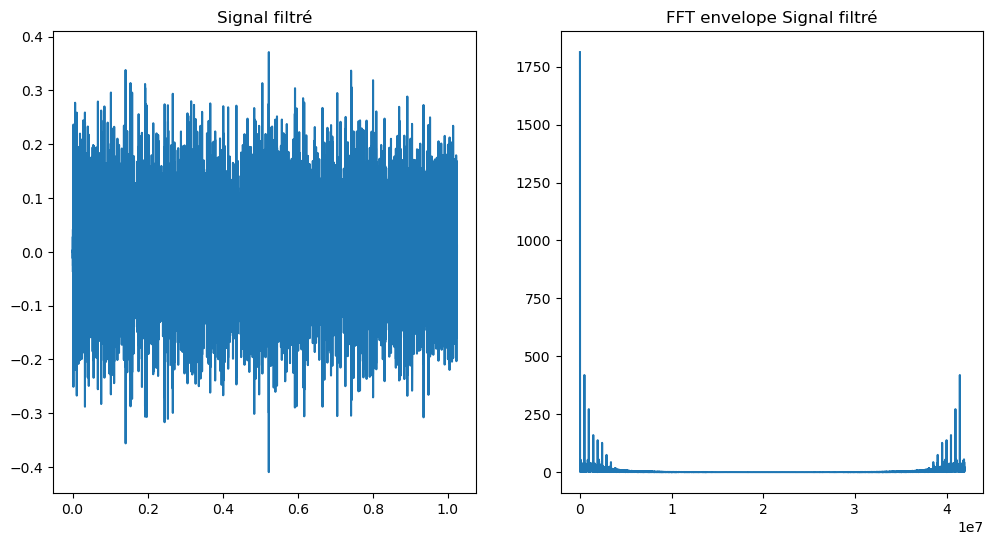

In [7]:
from scipy.signal import butter, hilbert, sosfreqz, sosfilt
import matplotlib.pyplot as plt

lowcut = 2500
highcut = 5500
fs = Fs
t=np.arange(len(Sig_IMS))/fs
def butter_bandpass(lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    sos = butter(order, [low, high], analog=False, btype='band', output='sos')
    return sos

def butter_bandpass_filter(data, lowcut, highcut, fs, order=16):
    sos = butter_bandpass(lowcut, highcut, fs, order=order)
    y = sosfilt(sos, data)
    return y



filtered_signal = butter_bandpass_filter(Sig_IMS, lowcut, highcut, fs, order=6)


envelope = np.abs(hilbert(filtered_signal))
TFF=np.fft.fft(envelope)

plt.figure(figsize=(12, 6))



plt.subplot(1,2,1)
plt.plot(t,filtered_signal)
plt.title('Signal filtré')
plt.subplot(1,2,2)
plt.plot(Freq,abs(np.fft.fft(envelope)))
plt.title('FFT envelope Signal filtré')


7) Comparer le spectre de l'enveloppe filtrée et le spectre de l'enveloppe sans filtrage.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


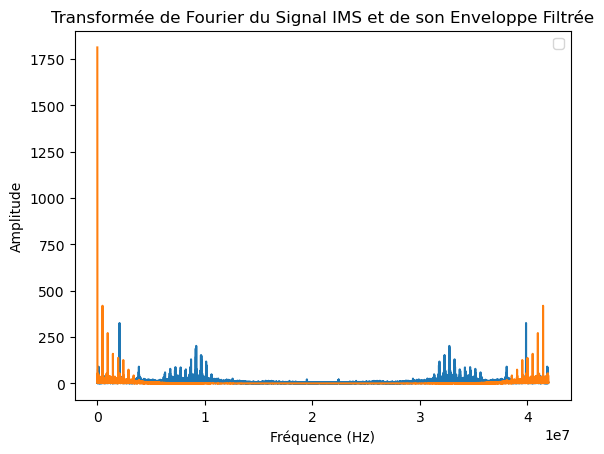

In [8]:
plt.figure()
plt.plot(Freq,abs(np.fft.fft(Sig_IMS)))
plt.plot(Freq,abs(np.fft.fft(envelope)))
plt.legend()

# Ajouter des titres et des étiquettes d'axe si nécessaire
plt.title('Transformée de Fourier du Signal IMS et de son Enveloppe Filtrée')
plt.xlabel('Fréquence (Hz)')
plt.ylabel('Amplitude')

plt.show()



remarque ; on voit bien que le filtre il a bien couper le spectre entre 2500 et 5500 hz 

En pratique on peut déterminer automatiquement la bande sur la quelle on doit filtrer à travers le Kurtogram : L'objectif du Kurtogramme est de trouver la bande qui maximise le kutosis.

Url : https://github.com/danielnewman09/Kurtogram-Analysis/blob/master/kurtogram.py



```
from kurtogram import fast_kurtogram
Kwav, Level_w, freq_w, c = fast_kurtogram(Sig_IMS,Fs,nlevel=6);
plt.pcolormesh(freq_w,Level_w,Kwav),plt.xlabel('Frequency (Hz)')
```



## Partie 3 : Detection d'un défaut de roulement
Le but de cette partie est de tracerles courbes des indicateurs pour chaque fichier dans la liste "Files".

8) Pour chaque fichier dans la liste "Files":

1.   Calculer le Kurtosis sur le signal non filtré
2.   Filtrer le signal en 2500 Hz et 5500 Hz
3.   Calculer le Kurtosis sur le signal filtré
4.   Calculer l'enveloppe du signal filtré
5.   Calculer les différents indicateurs sur l'enveloppe


In [28]:
 Files,ftp = ReadFiles() # Load liste of files
 kurt3=[]
 neg_ent=[]
 l2l1 =[]
for n in np.arange(len(Files)):
   print('File',n)
   try :
     Data = LoadFiles(Files[n],ftp) # Select and load the file 630
  
   except:
     print('Eror')
   sig = Data[0]
   kurt1 = kurtosis(sig) 
   filtered_signal2 = butter_bandpass_filter(sig, lowcut, highcut, fs, order=6)
   kurt2 = kurtosis(filtered_signal2) 
   envelope1 = np.abs(hilbert(filtered_signal2))

   kurt3 = kurtosis(envelope1)
   neg_ent = negentropy(envelope1)
   l2l1 = l2l1_ratio(envelope1)
   hoyer_idx = hoyer_index(envelope1)
   gini_idx = gini_index(envelope1)
   igi = improved_gini_index(np.abs(np.fft.fft(envelope1)))
   gm_igi = geometric_mean_igi(np.abs(np.fft.fft(envelope1)))
    
   print("Kurtosis du signal :", kurt1)
   print("Kurtosis du signal filtré  :", kurt2)
   print("Kurtosis de l'envloppe :", kurt3)
    

File 0
Kurtosis du signal : 3.6287626426442556
Kurtosis du signal filtré  : 4.147114426824687
Kurtosis de l'envloppe : 5.413095607848175
File 1
Kurtosis du signal : 3.648291081310854
Kurtosis du signal filtré  : 4.19546913341304
Kurtosis de l'envloppe : 5.758884187289847
File 2
Kurtosis du signal : 3.513475308823208
Kurtosis du signal filtré  : 4.309378239838356
Kurtosis de l'envloppe : 6.638184280594357
File 3
Kurtosis du signal : 4.157952723004809
Kurtosis du signal filtré  : 5.061641185220039
Kurtosis de l'envloppe : 10.235454528788571
File 4
Kurtosis du signal : 3.6031769286310373
Kurtosis du signal filtré  : 4.203600757758175
Kurtosis de l'envloppe : 5.6535588762079305
File 5
Kurtosis du signal : 3.4560936214628653
Kurtosis du signal filtré  : 4.118348665851704
Kurtosis de l'envloppe : 5.796323884445672
File 6
Kurtosis du signal : 3.478614975605989
Kurtosis du signal filtré  : 4.214238551338601
Kurtosis de l'envloppe : 5.521048969257265
File 7
Kurtosis du signal : 3.47198245503178

Kurtosis du signal : 3.3950734414213914
Kurtosis du signal filtré  : 4.122446563287008
Kurtosis de l'envloppe : 5.359099181712029
File 62
Kurtosis du signal : 3.4723936249303304
Kurtosis du signal filtré  : 4.360736889563937
Kurtosis de l'envloppe : 5.803519375567051
File 63
Kurtosis du signal : 3.394462244810976
Kurtosis du signal filtré  : 4.126189393099878
Kurtosis de l'envloppe : 5.578041891289921
File 64
Kurtosis du signal : 3.3780082777784424
Kurtosis du signal filtré  : 3.9301709267541036
Kurtosis de l'envloppe : 5.0011577304379875
File 65
Kurtosis du signal : 3.436486572235232
Kurtosis du signal filtré  : 4.109016459211661
Kurtosis de l'envloppe : 5.413416729928397
File 66
Kurtosis du signal : 3.4911372191123617
Kurtosis du signal filtré  : 4.133794829320746
Kurtosis de l'envloppe : 5.755932117639055
File 67
Kurtosis du signal : 3.346004972164705
Kurtosis du signal filtré  : 3.908725874126866
Kurtosis de l'envloppe : 5.154686320913063
File 68
Kurtosis du signal : 3.446990111715

Kurtosis du signal : 3.5378888733945146
Kurtosis du signal filtré  : 4.446318866798989
Kurtosis de l'envloppe : 5.883687385850618
File 122
Kurtosis du signal : 3.4002455766738815
Kurtosis du signal filtré  : 4.078464643858698
Kurtosis de l'envloppe : 5.280366838644946
File 123
Kurtosis du signal : 3.4507943486351516
Kurtosis du signal filtré  : 4.231601749909475
Kurtosis de l'envloppe : 5.568478913721753
File 124
Kurtosis du signal : 3.3466352920025497
Kurtosis du signal filtré  : 4.190116121958898
Kurtosis de l'envloppe : 6.302522799702624
File 125
Kurtosis du signal : 3.4445053285611102
Kurtosis du signal filtré  : 4.305793127188905
Kurtosis de l'envloppe : 5.805620047018014
File 126
Kurtosis du signal : 3.3380137985963
Kurtosis du signal filtré  : 3.8863353969212295
Kurtosis de l'envloppe : 4.91601396552738
File 127
Kurtosis du signal : 3.471458126344967
Kurtosis du signal filtré  : 4.566734608191809
Kurtosis de l'envloppe : 6.6767480585635
File 128
Kurtosis du signal : 3.3800510420

Kurtosis du signal : 3.3437128400504776
Kurtosis du signal filtré  : 4.101031691168987
Kurtosis de l'envloppe : 5.415413333319378
File 182
Kurtosis du signal : 3.267315005954134
Kurtosis du signal filtré  : 3.9356935693498074
Kurtosis de l'envloppe : 5.120214451503925
File 183
Kurtosis du signal : 3.3541207352122204
Kurtosis du signal filtré  : 3.9435078811023114
Kurtosis de l'envloppe : 5.286921122653844
File 184
Kurtosis du signal : 3.499092505761708
Kurtosis du signal filtré  : 4.390082901827746
Kurtosis de l'envloppe : 6.309852692679685
File 185
Kurtosis du signal : 3.349412751660938
Kurtosis du signal filtré  : 4.233738420596873
Kurtosis de l'envloppe : 6.15272481761107
File 186
Kurtosis du signal : 3.4160923963921235
Kurtosis du signal filtré  : 4.350123348324083
Kurtosis de l'envloppe : 6.1516278589498645
File 187
Kurtosis du signal : 3.62733560801803
Kurtosis du signal filtré  : 4.624827751156796
Kurtosis de l'envloppe : 6.852935298365791
File 188
Kurtosis du signal : 3.5084444

Kurtosis du signal : 3.371201721911139
Kurtosis du signal filtré  : 3.8589294880732137
Kurtosis de l'envloppe : 4.776888269081703
File 242
Kurtosis du signal : 3.3074947402522206
Kurtosis du signal filtré  : 3.970951974278248
Kurtosis de l'envloppe : 5.2674871507554695
File 243
Kurtosis du signal : 3.4881647708848416
Kurtosis du signal filtré  : 4.202440422519668
Kurtosis de l'envloppe : 5.431465332887193
File 244
Kurtosis du signal : 3.4745222723146703
Kurtosis du signal filtré  : 4.228119358139864
Kurtosis de l'envloppe : 6.353238534380667
File 245
Kurtosis du signal : 3.4655293058579137
Kurtosis du signal filtré  : 3.972464215203802
Kurtosis de l'envloppe : 5.358000299653104
File 246
Kurtosis du signal : 3.5528697268991065
Kurtosis du signal filtré  : 4.168187815215912
Kurtosis de l'envloppe : 5.599548686402024
File 247
Kurtosis du signal : 3.4825257504421647
Kurtosis du signal filtré  : 4.087441665876178
Kurtosis de l'envloppe : 5.2208435601712475
File 248
Kurtosis du signal : 3.27

Kurtosis du signal : 3.500196713065042
Kurtosis du signal filtré  : 3.9071034693345585
Kurtosis de l'envloppe : 5.291968852567143
File 302
Kurtosis du signal : 3.3559125944069117
Kurtosis du signal filtré  : 3.947607225949915
Kurtosis de l'envloppe : 4.9393567755542875
File 303
Kurtosis du signal : 3.523982653973766
Kurtosis du signal filtré  : 4.1677159013366785
Kurtosis de l'envloppe : 5.722278737151291
File 304
Kurtosis du signal : 3.3618641876245507
Kurtosis du signal filtré  : 4.0868911136942065
Kurtosis de l'envloppe : 5.188531266286117
File 305
Kurtosis du signal : 3.3981230179180373
Kurtosis du signal filtré  : 4.232272833014759
Kurtosis de l'envloppe : 5.60017330148476
File 306
Kurtosis du signal : 3.431997842365322
Kurtosis du signal filtré  : 4.271525999337021
Kurtosis de l'envloppe : 5.837975390967161
File 307
Kurtosis du signal : 3.4120063063697414
Kurtosis du signal filtré  : 4.151616879929134
Kurtosis de l'envloppe : 5.749132092762515
File 308
Kurtosis du signal : 3.4208

Kurtosis du signal : 3.460599220450614
Kurtosis du signal filtré  : 4.463847722367858
Kurtosis de l'envloppe : 7.117785737275023
File 362
Kurtosis du signal : 3.296495418006994
Kurtosis du signal filtré  : 4.132144826107226
Kurtosis de l'envloppe : 5.115343488007281
File 363
Kurtosis du signal : 3.400597038419386
Kurtosis du signal filtré  : 3.9198942030334125
Kurtosis de l'envloppe : 4.781644129485762
File 364
Kurtosis du signal : 3.411822456846819
Kurtosis du signal filtré  : 4.096722433713629
Kurtosis de l'envloppe : 5.4212961723867155
File 365
Kurtosis du signal : 3.404976615861351
Kurtosis du signal filtré  : 3.999180222384947
Kurtosis de l'envloppe : 5.280458147871087
File 366
Kurtosis du signal : 3.59416197100937
Kurtosis du signal filtré  : 4.580376329639694
Kurtosis de l'envloppe : 7.529736219905025
File 367
Kurtosis du signal : 3.3910969739121195
Kurtosis du signal filtré  : 4.048543344269022
Kurtosis de l'envloppe : 5.101506590094535
File 368
Kurtosis du signal : 3.471987151

Kurtosis du signal : 3.352352808390968
Kurtosis du signal filtré  : 3.915003579566098
Kurtosis de l'envloppe : 4.664762260889295
File 422
Kurtosis du signal : 3.4000626852348446
Kurtosis du signal filtré  : 3.830998639656244
Kurtosis de l'envloppe : 4.8525029708573735
File 423
Kurtosis du signal : 3.3703430496021016
Kurtosis du signal filtré  : 4.1702704627326845
Kurtosis de l'envloppe : 5.703224386045018
File 424
Kurtosis du signal : 3.3379413350421916
Kurtosis du signal filtré  : 3.7649699643667702
Kurtosis de l'envloppe : 4.361514487648617
File 425
Kurtosis du signal : 3.4444621380077165
Kurtosis du signal filtré  : 4.178909904622136
Kurtosis de l'envloppe : 5.976239137983672
File 426
Kurtosis du signal : 3.424512117705835
Kurtosis du signal filtré  : 4.049603782143903
Kurtosis de l'envloppe : 5.233691642089428
File 427
Kurtosis du signal : 3.2049135347984667
Kurtosis du signal filtré  : 3.728602521151893
Kurtosis de l'envloppe : 4.686470731119483
File 428
Kurtosis du signal : 3.477

Kurtosis du signal : 3.3700231720140432
Kurtosis du signal filtré  : 3.9934827244171958
Kurtosis de l'envloppe : 5.271769834204288
File 482
Kurtosis du signal : 3.5325788003732015
Kurtosis du signal filtré  : 4.221850500064327
Kurtosis de l'envloppe : 5.972514861103487
File 483
Kurtosis du signal : 3.4047138169573614
Kurtosis du signal filtré  : 3.9564126831525503
Kurtosis de l'envloppe : 5.16732949600295
File 484
Kurtosis du signal : 3.3695643133022144
Kurtosis du signal filtré  : 3.912761581214096
Kurtosis de l'envloppe : 5.243777544614313
File 485
Kurtosis du signal : 3.4330988391266684
Kurtosis du signal filtré  : 4.096810897437808
Kurtosis de l'envloppe : 5.6881792389984716
File 486
Kurtosis du signal : 3.2680942154490045
Kurtosis du signal filtré  : 3.9141714784934316
Kurtosis de l'envloppe : 4.970042104290457
File 487
Kurtosis du signal : 3.3259681516945
Kurtosis du signal filtré  : 3.9935958965118052
Kurtosis de l'envloppe : 5.382444769352325
File 488
Kurtosis du signal : 3.493

Kurtosis du signal : 3.3818054415969727
Kurtosis du signal filtré  : 3.936562210028768
Kurtosis de l'envloppe : 4.9151411097922955
File 542
Kurtosis du signal : 3.387673707406096
Kurtosis du signal filtré  : 4.043997924097748
Kurtosis de l'envloppe : 5.178213768708118
File 543
Kurtosis du signal : 3.394601507815008
Kurtosis du signal filtré  : 3.8453898454559368
Kurtosis de l'envloppe : 4.295205527810414
File 544
Kurtosis du signal : 3.365869739574193
Kurtosis du signal filtré  : 3.7214287204218004
Kurtosis de l'envloppe : 4.3693149245637795
File 545
Kurtosis du signal : 3.4364173780138687
Kurtosis du signal filtré  : 3.8397703286858658
Kurtosis de l'envloppe : 4.340043054217999
File 546
Kurtosis du signal : 3.428763797537253
Kurtosis du signal filtré  : 3.8850528978064425
Kurtosis de l'envloppe : 4.758412883337223
File 547
Kurtosis du signal : 3.328948999117361
Kurtosis du signal filtré  : 3.744600545130529
Kurtosis de l'envloppe : 4.130407190248894
File 548
Kurtosis du signal : 3.434

Kurtosis du signal : 3.5609820953544635
Kurtosis du signal filtré  : 4.140384203588776
Kurtosis de l'envloppe : 5.025279091067048
File 602
Kurtosis du signal : 3.3948689754085986
Kurtosis du signal filtré  : 3.7836218251989346
Kurtosis de l'envloppe : 3.8823985065129305
File 603
Kurtosis du signal : 3.7432975552995384
Kurtosis du signal filtré  : 4.376251541272918
Kurtosis de l'envloppe : 4.84326708733068
File 604
Kurtosis du signal : 3.5517784022496657
Kurtosis du signal filtré  : 4.095439887664191
Kurtosis de l'envloppe : 4.135792424259993
File 605
Kurtosis du signal : 3.462522649204861
Kurtosis du signal filtré  : 3.9368454523272804
Kurtosis de l'envloppe : 4.184066044492058
File 606
Kurtosis du signal : 3.6215580358289503
Kurtosis du signal filtré  : 4.023045160898128
Kurtosis de l'envloppe : 3.942700366071506
File 607
Kurtosis du signal : 3.594437285098658
Kurtosis du signal filtré  : 4.258113500965093
Kurtosis de l'envloppe : 4.62855506551287
File 608
Kurtosis du signal : 3.49482

Kurtosis du signal : 3.7678642560795574
Kurtosis du signal filtré  : 4.341766376066674
Kurtosis de l'envloppe : 4.174619772049299
File 662
Kurtosis du signal : 3.7654697765915444
Kurtosis du signal filtré  : 4.408316020362725
Kurtosis de l'envloppe : 4.200092257947542
File 663
Kurtosis du signal : 3.7869819151709754
Kurtosis du signal filtré  : 4.48382221938085
Kurtosis de l'envloppe : 4.734520302322991
File 664
Kurtosis du signal : 3.8916386740504207
Kurtosis du signal filtré  : 4.646456197772871
Kurtosis de l'envloppe : 4.640441113234034
File 665
Kurtosis du signal : 3.8149963220300815
Kurtosis du signal filtré  : 4.50848073384079
Kurtosis de l'envloppe : 4.46263434040591
File 666
Kurtosis du signal : 3.925951169317566
Kurtosis du signal filtré  : 4.480252673226785
Kurtosis de l'envloppe : 4.346413011546799
File 667
Kurtosis du signal : 3.7773012336510248
Kurtosis du signal filtré  : 4.473558138011434
Kurtosis de l'envloppe : 4.298544558436018
File 668
Kurtosis du signal : 3.81763520

Kurtosis du signal : 5.34215083104434
Kurtosis du signal filtré  : 6.1547998456032
Kurtosis de l'envloppe : 4.767981311818547
File 722
Kurtosis du signal : 5.578314431277737
Kurtosis du signal filtré  : 6.263062278837587
Kurtosis de l'envloppe : 4.7317760294036235
File 723
Kurtosis du signal : 5.531885326050883
Kurtosis du signal filtré  : 6.404704424641979
Kurtosis de l'envloppe : 5.106919672979999
File 724
Kurtosis du signal : 5.624170868009734
Kurtosis du signal filtré  : 6.483822522897991
Kurtosis de l'envloppe : 5.056796866841876
File 725
Kurtosis du signal : 5.398438400002175
Kurtosis du signal filtré  : 6.1845291549766115
Kurtosis de l'envloppe : 4.8090627986464085
File 726
Kurtosis du signal : 5.304491357206314
Kurtosis du signal filtré  : 6.161064501949828
Kurtosis de l'envloppe : 4.838096694648093
File 727
Kurtosis du signal : 5.66106202250853
Kurtosis du signal filtré  : 6.6501455370572815
Kurtosis de l'envloppe : 5.3103816269723865
File 728
Kurtosis du signal : 5.4481806492

Kurtosis du signal : 3.771792725410825
Kurtosis du signal filtré  : 4.526536251209887
Kurtosis de l'envloppe : 5.060483587665366
File 782
Kurtosis du signal : 3.9268405707904264
Kurtosis du signal filtré  : 5.006711719635364
Kurtosis de l'envloppe : 6.229863133667238
File 783
Kurtosis du signal : 3.9667239500366183
Kurtosis du signal filtré  : 5.067364158414472
Kurtosis de l'envloppe : 7.255917982947798
File 784
Kurtosis du signal : 3.66521458028488
Kurtosis du signal filtré  : 4.229934567782085
Kurtosis de l'envloppe : 4.780834807841001
File 785
Kurtosis du signal : 3.748812469695607
Kurtosis du signal filtré  : 4.1935604853778505
Kurtosis de l'envloppe : 4.790917269121657
File 786
Kurtosis du signal : 3.8222244311026867
Kurtosis du signal filtré  : 4.433974226850717
Kurtosis de l'envloppe : 5.170057645349911
File 787
Kurtosis du signal : 3.6527158309279764
Kurtosis du signal filtré  : 4.070893683579645
Kurtosis de l'envloppe : 4.413810259884423
File 788
Kurtosis du signal : 3.6411511

Kurtosis du signal : 4.9389616056842724
Kurtosis du signal filtré  : 5.7959175319480885
Kurtosis de l'envloppe : 4.3576735407435745
File 842
Kurtosis du signal : 4.715053802952213
Kurtosis du signal filtré  : 5.4511156973018835
Kurtosis de l'envloppe : 4.124993348260558
File 843
Kurtosis du signal : 4.9828216546950355
Kurtosis du signal filtré  : 5.649330675870495
Kurtosis de l'envloppe : 4.295225143720605
File 844
Kurtosis du signal : 5.070871004476122
Kurtosis du signal filtré  : 5.773657784861212
Kurtosis de l'envloppe : 4.51229589593246
File 845
Kurtosis du signal : 5.18197205093078
Kurtosis du signal filtré  : 5.796724964748957
Kurtosis de l'envloppe : 4.499605041408498
File 846
Kurtosis du signal : 5.246652075464767
Kurtosis du signal filtré  : 5.844563821164488
Kurtosis de l'envloppe : 4.56021678858329
File 847
Kurtosis du signal : 5.048758309317642
Kurtosis du signal filtré  : 5.742737123817849
Kurtosis de l'envloppe : 4.357598724271354
File 848
Kurtosis du signal : 4.763968278

Kurtosis du signal : 3.651267186465122
Kurtosis du signal filtré  : 4.930021920782015
Kurtosis de l'envloppe : 5.064785006927391
File 902
Kurtosis du signal : 3.7079267107692915
Kurtosis du signal filtré  : 5.196921685119623
Kurtosis de l'envloppe : 5.614262520556805
File 903
Kurtosis du signal : 3.8912405209916168
Kurtosis du signal filtré  : 5.361884818566521
Kurtosis de l'envloppe : 5.0774045472747495
File 904
Kurtosis du signal : 3.9429930692778727
Kurtosis du signal filtré  : 5.465050462030756
Kurtosis de l'envloppe : 4.755680522285733
File 905
Kurtosis du signal : 4.348028731376786
Kurtosis du signal filtré  : 5.994988021686481
Kurtosis de l'envloppe : 4.940827488651607
File 906
Kurtosis du signal : 4.183291689599852
Kurtosis du signal filtré  : 5.505395366182962
Kurtosis de l'envloppe : 4.42994791608542
File 907
Kurtosis du signal : 4.385662486057391
Kurtosis du signal filtré  : 5.5872577293585
Kurtosis de l'envloppe : 4.404595607138421
File 908
Kurtosis du signal : 4.2336770503

Kurtosis du signal : 3.1682813727891954
Kurtosis du signal filtré  : 3.433459895817322
Kurtosis de l'envloppe : 3.516062426187444
File 962
Kurtosis du signal : 3.293096182885585
Kurtosis du signal filtré  : 3.832104131501296
Kurtosis de l'envloppe : 4.243560888591289
File 963
Kurtosis du signal : 3.446314670875816
Kurtosis du signal filtré  : 4.216278974744499
Kurtosis de l'envloppe : 4.46351893783066
File 964
Kurtosis du signal : 3.1623530711987686
Kurtosis du signal filtré  : 3.4073232123658315
Kurtosis de l'envloppe : 3.0980309504691173
File 965
Kurtosis du signal : 3.466871920934436
Kurtosis du signal filtré  : 3.4516444633498486
Kurtosis de l'envloppe : 2.3085291095848475
File 966
Kurtosis du signal : 3.173704585486259
Kurtosis du signal filtré  : 2.9744458925821573
Kurtosis de l'envloppe : 2.3849408635840077
File 967
Kurtosis du signal : 2.7354586639291147
Kurtosis du signal filtré  : 2.487393263869438
Kurtosis de l'envloppe : 2.5898529918866924
File 968
Kurtosis du signal : 2.74

9) Tracer les différents indicateurs en fonction de l'index des fichiers.

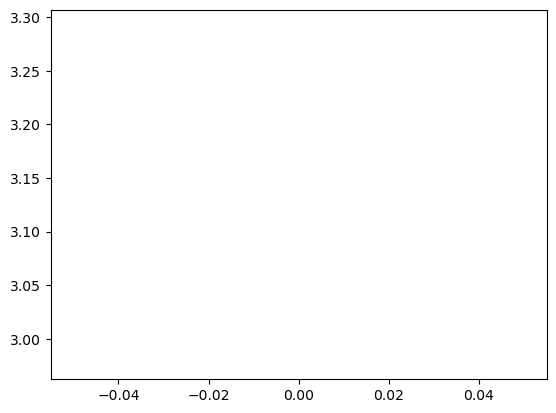

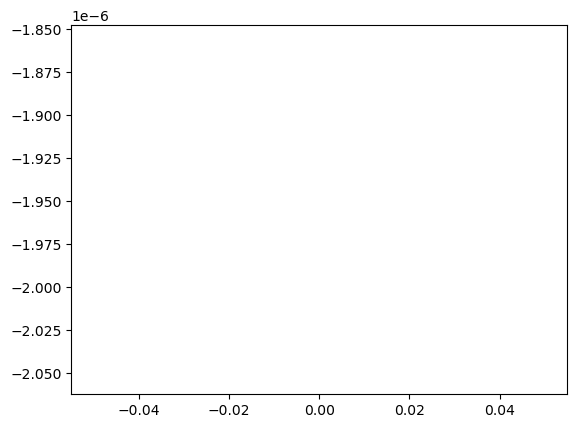

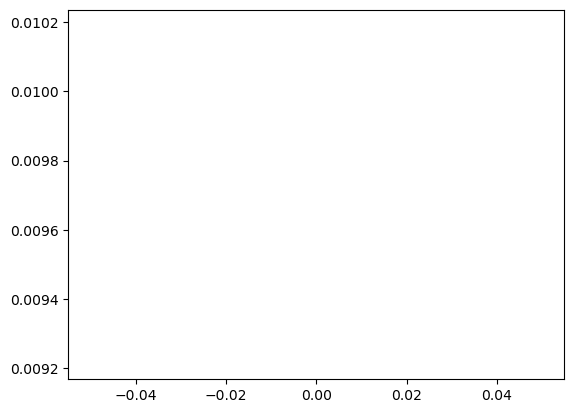

In [30]:
plt.figure(1)
plt.plot(kurt3)
plt.figure(2)
plt.plot(neg_ent)
plt.figure(3)
plt.plot(l2l1)

10) Comparer entre les différents indicateurs et determiner ceux qui sont les plus robustes.

En pratique, il peut être nécessaire de regrouper certains indicateurs afin de réduire la dimension des variables. Dans une telle situation, la distance de Mahalanobis offre une solution efficace, permettant d'évaluer les relations complexes entre les variables consolidées, tout en tenant compte des corrélations existantes.

In [ ]:
from scipy.linalg import qr
from scipy.stats import chi2
def calculerMahalanobis(Test, Train):
    # Calculer la décomposition QR de Train
    Q, R = qr(Train - np.mean(Train, axis=0), mode='economic')

    # Calculer la matrice de données transformée ri
    ri = np.linalg.solve(R, (Test - np.mean(Train, axis=0)).T).T

    # Calculer la distance Mahalanobis au carré pour chaque point dans Y
    d_square = np.sum(ri ** 2, axis=1) /(Train.shape[0] - 1)

    # Calculer la valeur de p pour chaque distance Mahalanobis
    P_val = 1 - chi2.cdf(d_square, Train.T.shape[0])

    return d_square, P_val


11) Utilisez la fonction ci-dessus pour calculer la distance de Mahalanobis au carré. Pour l'entraînement, choisissez les 300 premiers fichiers.

12) Tracer la distance de Mahalanobis au carré et la p-value en fonction des indices des fichiers. Commenter les résultats.